In [1]:
#Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os

In [2]:
#Read data and display
data = pd.read_csv("PCOS_data_without_infertility.csv")
data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Follicle No. (Ave),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 45
0,1,1,0,28,44.6,152.000,19.304017,15,78,22,...,0,110,80,3,3,3.0,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0,120,70,3,5,4.0,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,0,120,80,13,15,14.0,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0,120,70,2,2,2.0,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0,120,80,3,4,3.5,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,537,537,0,35,50.0,164.592,18.456637,17,72,16,...,0,110,70,1,0,0.5,17.5,10.0,6.7,NaN
536,538,538,0,30,63.2,158.000,25.316456,15,72,18,...,0,110,70,9,7,8.0,19.0,18.0,8.2,NaN
537,539,539,0,36,54.0,152.000,23.372576,13,74,20,...,0,110,80,1,0,0.5,18.0,9.0,7.3,NaN
538,540,540,0,27,50.0,150.000,22.222222,15,74,20,...,0,110,70,7,6,6.5,18.0,16.0,11.5,NaN


In [3]:
#Drop poor/collinear predictors
X = data.drop(["Sl. No", "Patient File No.", "Follicle No. (L)", "Follicle No. (R)", "Follicle No. (Ave)", "Unnamed: 45"], axis=1)
#Separate test predictor
Y = data['Follicle No. (Ave)']

#Drop any null values
X[X.isnull().any(axis=1)]
X.dropna(axis='columns', inplace=True)

<AxesSubplot:>

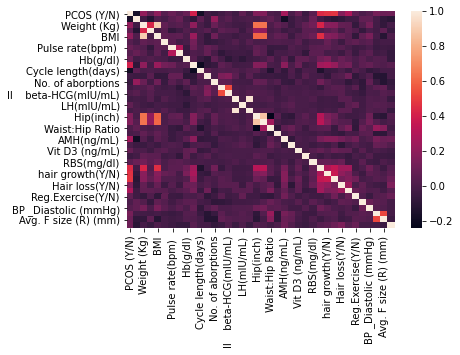

In [4]:
#Produce correlation matrix of data
sns.heatmap(X.corr(), annot=False)

In [13]:
# Normalize
from sklearn import preprocessing
X = preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=False)

In [14]:
#Split the training/testing data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

In [23]:
mlr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=True, positive=True)
mlr.fit(X_train,Y_train)
#positive=True for dense arrays

LinearRegression(n_jobs=True, positive=True)

In [24]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = mlr.predict(X_train)
y_pred_test = mlr.predict(X_test)

accuracy_train = r2_score(Y_train, y_pred_train)
print("Training R2 for Multiple Linear Regression Model: ", accuracy_train)

accuracy_test = r2_score(Y_test, y_pred_test)
print("Testing R2 for Multiple Linear Regression Model: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(Y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(Y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training R2 for Multiple Linear Regression Model:  0.4883908221670624
Testing R2 for Multiple Linear Regression Model:  0.26707511827472996
RMSE for Training Data:  2.954609669755485
RMSE for Testing Data:  3.4362471316985284


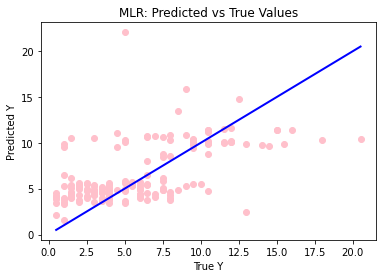

In [25]:
plt.scatter(Y_test, y_pred_test, c='pink')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='blue', lw=2)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('MLR: Predicted vs True Values')
plt.show()

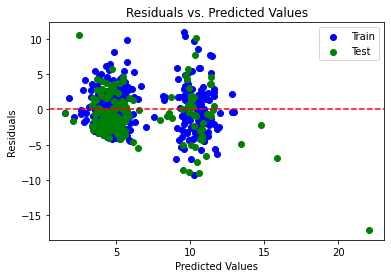

In [27]:
#Calculate the residuals
residuals_train = np.squeeze(Y_train) - np.squeeze(y_pred_train)
residuals_test = np.squeeze(Y_test) - np.squeeze(y_pred_test)

#Plot the residuals
plt.scatter(y_pred_train, residuals_train, c='blue', label='Train')
plt.scatter(y_pred_test, residuals_test, c='green', label='Test')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals vs. Predicted Values')
plt.show()